# Global CO₂ Emissions Analysis

This project analyzes historical CO₂ emissions data by country to understand global trends, identify top emitters, and provide insights to help combat climate change.


## Problem Statement

Global CO₂ emissions are a leading cause of climate change, with certain countries contributing significantly more than others. Understanding the trends and identifying the top emitters over time is essential to target efforts for reducing emissions and mitigating environmental impact.


## Data Cleaning and Preparation

We cleaned the dataset by:

- Handling missing values in the 'Code' column.  
- Ensuring correct data types for each column.  
- Removing or confirming zero emission records to avoid misleading analysis.  

This preparation ensures accuracy and reliability in our subsequent analysis.


In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('co2_emission.csv') 

# Display first 5 rows
df.head()


,Entity,Code,Year,Annual_CO₂_emissions_tonnes_
0,Africa,NaN,1751,0.0
1,Africa,NaN,1752,0.0
2,Africa,NaN,1753,0.0
3,Africa,NaN,1754,0.0
4,Africa,NaN,1755,0.0


In [2]:
# Get the column names
df.columns

# Get basic info about columns, data types, nulls
df.info()

# Check missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20853 entries, 0 to 20852
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Entity                        20853 non-null  object 
 1   Code                          18646 non-null  object 
 2   Year                          20853 non-null  int64  
 3   Annual_CO₂_emissions_tonnes_  20853 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 651.8+ KB


Entity                             0
Code                            2207
Year                               0
Annual_CO₂_emissions_tonnes_       0
dtype: int64

In [3]:
# Statistical summary
df.describe()


,Year,Annual_CO₂_emissions_tonnes_
count,20853.000000,2.085300e+04
mean,1953.339424,1.930517e+08
std,57.903089,1.345143e+09
min,1751.000000,-6.255223e+08
25%,1932.000000,3.187680e+05
50%,1971.000000,3.828880e+06
75%,1995.000000,3.706898e+07
max,2017.000000,3.615326e+10


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned data
df = pd.read_csv('co2_emission.csv')

# Rename for easier coding
df.rename(columns={
    'Entity': 'Country',
    'Annual_CO₂_emissions_tonnes_': 'CO2_Emissions'
}, inplace=True)

# 1. Dataset overview
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())


  Country Code  Year  CO2_Emissions
0  Africa  NaN  1751            0.0
1  Africa  NaN  1752            0.0
2  Africa  NaN  1753            0.0
3  Africa  NaN  1754            0.0
4  Africa  NaN  1755            0.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20853 entries, 0 to 20852
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country        20853 non-null  object 
 1   Code           18646 non-null  object 
 2   Year           20853 non-null  int64  
 3   CO2_Emissions  20853 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 651.8+ KB
None
               Year  CO2_Emissions
count  20853.000000   2.085300e+04
mean    1953.339424   1.930517e+08
std       57.903089   1.345143e+09
min     1751.000000  -6.255223e+08
25%     1932.000000   3.187680e+05
50%     1971.000000   3.828880e+06
75%     1995.000000   3.706898e+07
max     2017.000000   3.615326e+10
Country             0
Code  

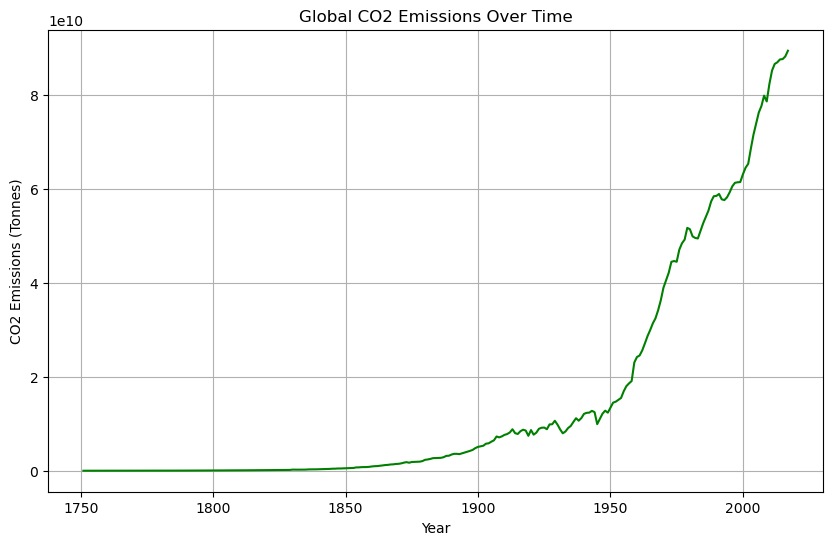

In [8]:
# 2. Total CO2 emissions by year (Global Trend)
global_emissions = df.groupby('Year')['CO2_Emissions'].sum()

plt.figure(figsize=(10,6))
plt.plot(global_emissions.index, global_emissions.values, color='green')
plt.title('Global CO2 Emissions Over Time')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (Tonnes)')
plt.grid(True)
plt.show()

- **Global Trend:** Total CO₂ emissions have generally increased over time, indicating growing environmental impact worldwide.  


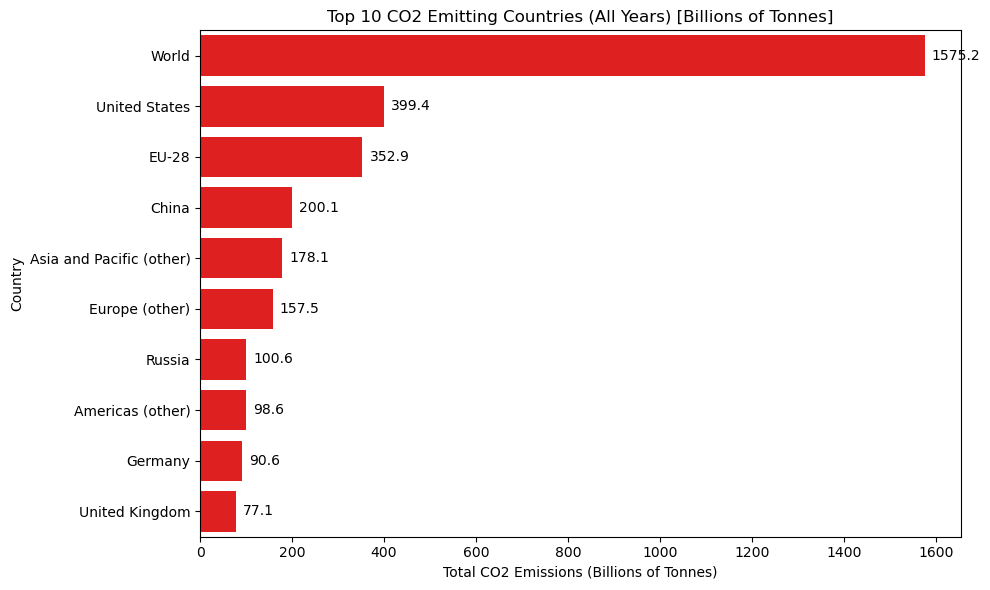

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# 3. Top 10 emitting countries (all years combined)
top_countries = df.groupby('Country')['CO2_Emissions'].sum().sort_values(ascending=False).head(10)

# Scale values to billions
top_countries_billions = top_countries / 1_000_000_000

plt.figure(figsize=(10,6))
bars = sns.barplot(x=top_countries_billions.values, y=top_countries_billions.index, color='Red')
plt.title('Top 10 CO2 Emitting Countries (All Years) [Billions of Tonnes]')
plt.xlabel('Total CO2 Emissions (Billions of Tonnes)')
plt.ylabel('Country')

# Add values on bars with 1 decimal place
for bar in bars.patches:
    width = bar.get_width()
    plt.text(width + max(top_countries_billions.values)*0.01,
             bar.get_y() + bar.get_height() / 2,
             f'{width:.1f}',  # 1 decimal place
             va='center')

plt.tight_layout()
plt.show()



- **Top Emitters (All Years):** The United States, China, and several other countries consistently rank as the highest CO₂ contributors.  


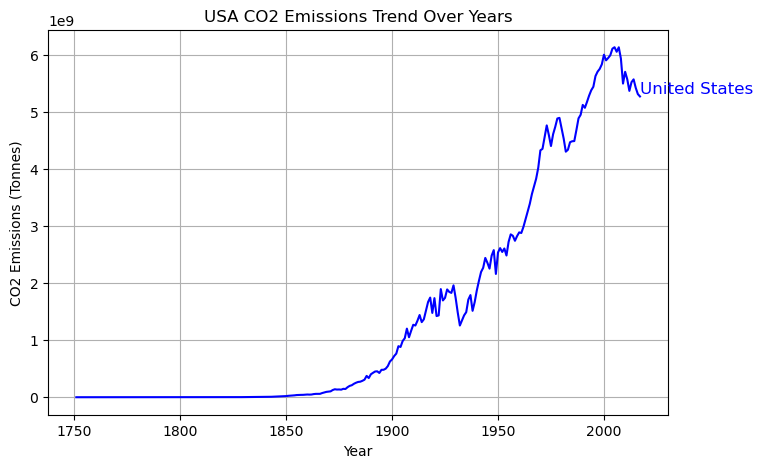

In [33]:
import matplotlib.pyplot as plt

usa_data = df[df['Country'] == 'United States']

plt.figure(figsize=(8,5))
plt.plot(usa_data['Year'], usa_data['CO2_Emissions'], color='blue')
plt.title('USA CO2 Emissions Trend Over Years')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (Tonnes)')
plt.grid(True)

# Add text label near the last data point
plt.text(usa_data['Year'].max(), usa_data['CO2_Emissions'].iloc[-1], 'United States', 
         fontsize=12, color='blue', verticalalignment='bottom')

plt.show()


 - **Country-Specific Trend:** The United States shows a peak followed by a gradual decline in emissions in recent years, possibly due to policy changes and technological improvements.  


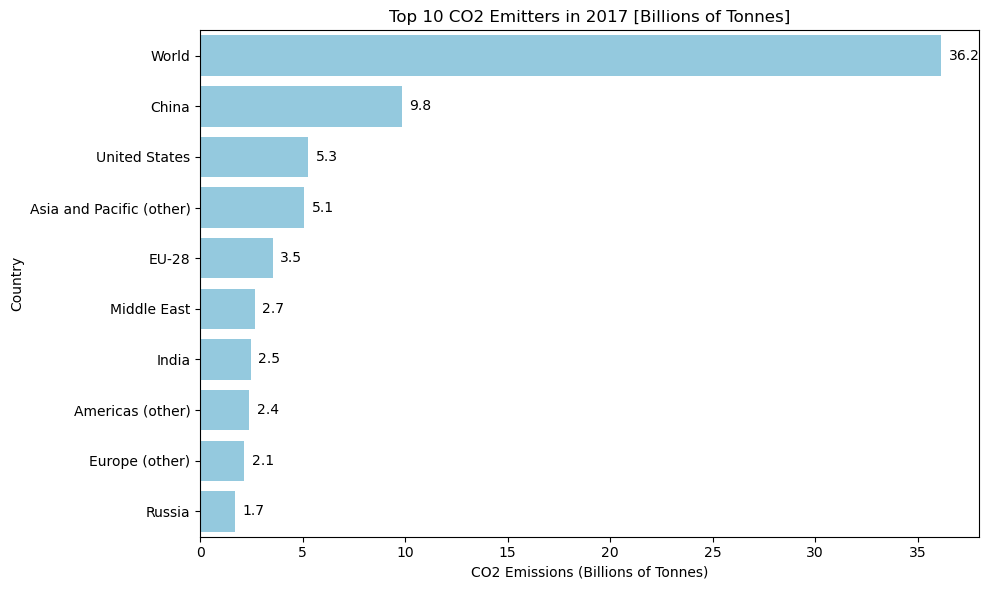

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# 5. Latest year emissions ranking
latest_year = df['Year'].max()
latest_data = df[df['Year'] == latest_year]
top_latest = latest_data.groupby('Country')['CO2_Emissions'].sum().sort_values(ascending=False).head(10)

# Scale values to billions
top_latest_billions = top_latest / 1_000_000_000

plt.figure(figsize=(10,6))
bars = sns.barplot(x=top_latest_billions.values, y=top_latest_billions.index, color='skyblue')
plt.title(f'Top 10 CO2 Emitters in {latest_year} [Billions of Tonnes]')
plt.xlabel('CO2 Emissions (Billions of Tonnes)')
plt.ylabel('Country')

# Add values on bars with 1 decimal place
for bar in bars.patches:
    width = bar.get_width()
    plt.text(width + max(top_latest_billions.values)*0.01,
             bar.get_y() + bar.get_height() / 2,
             f'{width:.1f}',  # 1 decimal place
             va='center')

plt.tight_layout()
plt.show()


- **Latest Year Analysis:** In the most recent year, China leads in emissions, followed by the United States and India.


The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


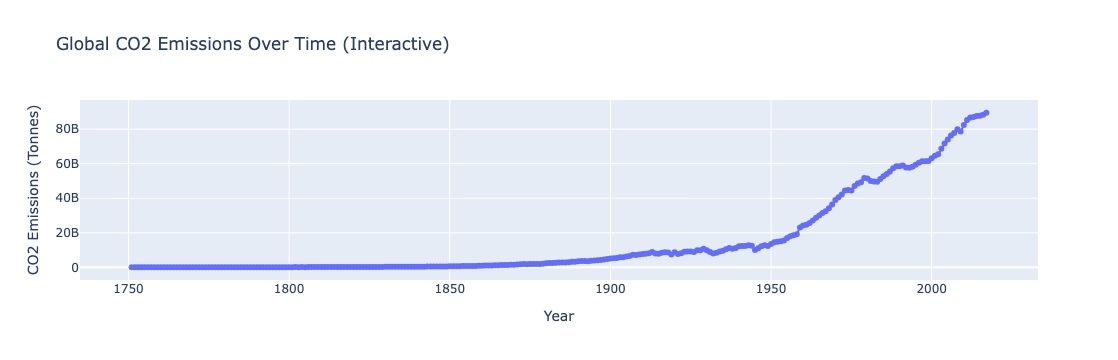

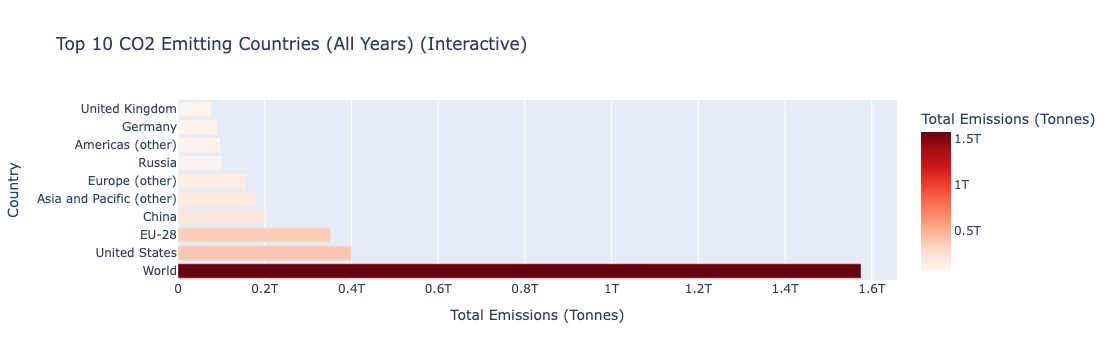

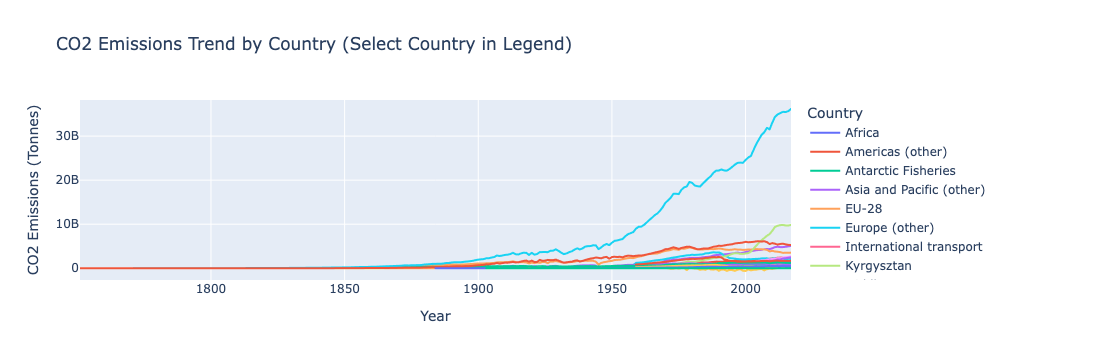

In [47]:
import plotly.express as px
import pandas as pd

# Assuming your cleaned dataframe is named df and columns are: Country, Year, CO2_Emissions

# 1. Interactive Line Chart - Global CO2 Emissions Trend
global_emissions = df.groupby('Year')['CO2_Emissions'].sum().reset_index()

fig1 = px.line(global_emissions,
               x='Year',
               y='CO2_Emissions',
               title='Global CO2 Emissions Over Time (Interactive)',
               labels={'CO2_Emissions': 'CO2 Emissions (Tonnes)', 'Year': 'Year'},
               markers=True)

fig1.show()

# 2. Interactive Horizontal Bar - Top 10 CO2 Emitting Countries (All Years Combined)
top_countries = df.groupby('Country')['CO2_Emissions'].sum().sort_values(ascending=False).head(10).reset_index()

fig2 = px.bar(top_countries,
              x='CO2_Emissions',
              y='Country',
              orientation='h',
              title='Top 10 CO2 Emitting Countries (All Years) (Interactive)',
              labels={'CO2_Emissions': 'Total Emissions (Tonnes)', 'Country': 'Country'},
              color='CO2_Emissions',
              color_continuous_scale='Reds')

fig2.show()

# 3. Interactive Country-wise Trend with Dropdown Filter
fig3 = px.line(df,
               x='Year',
               y='CO2_Emissions',
               color='Country',
               title='CO2 Emissions Trend by Country (Select Country in Legend)',
               labels={'CO2_Emissions': 'CO2 Emissions (Tonnes)', 'Year': 'Year'})

fig3.update_layout(legend_title_text='Country')
fig3.show()


## Interactive Dashboard using Plotly

## Conclusion:
The objective of this project was to analyze global CO2 emissions data and identify key contributors and trends over time.

Through EDA and visualization, we found:

Global CO2 emissions have increased dramatically post-1950s.
China, USA, and India are consistently the top emitters.
The USA shows a declining trend in emissions in recent years.
This analysis can help policymakers focus on high-emission countries and track progress towards climate goals.